In [1]:
import pandas as pd

solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [8]:
# 3.1
#В нашем временном ряде есть несколько пропусков, они обозначены числом -1. 
# Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

final = solar_data.shape[0]
for i in range(0, final):
    if solar_data['cum_power'].iloc[i] == -1:
        solar_data['cum_power'].iloc[i] = (solar_data['cum_power'].iloc[i-1]+solar_data['cum_power'].iloc[i+1]) / 2
        
display(solar_data['cum_power'].mean())


/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_96643/2809492284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'].iloc[i] = (solar_data['cum_power'].iloc[i-1]+solar_data['cum_power'].iloc[i+1]) / 2


23848.246987951807

In [19]:
# 3.2
# Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

# Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

# Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), 
# который позволяет выделять периоды (в данном случае 'М' — месяц).

# Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

# Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

solar_data['date'] = pd.to_datetime(solar_data['date'])
# временные сериас, который сохраним потом в столбец
day_power = pd.Series(
    data = list(range(0,final)),
    index = list(range(0,final)),
    name = 'day'
)
#высчитываем ежедневную выработку
for i in range(1, final):
    day_power.iloc[i] = solar_data['cum_power'].iloc[i] - solar_data['cum_power'].iloc[i-1]
    
# создаем столбец
solar_data['day_power'] = day_power
#display(solar_data.head())

solar_data['month'] = solar_data['date'].dt.to_period('M')
solar_data.groupby(by='month')['day_power'].mean()


    

month
2017-01     3.129032
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

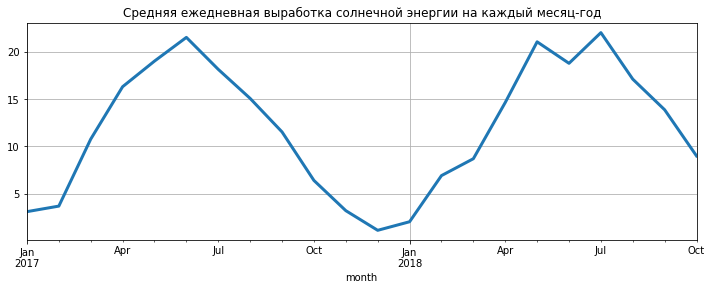

In [28]:
# 3.3
# Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. 
# Не забудьте подписать оси и сам график.
import plotly
import plotly.express as px

line_data = solar_data.groupby(by='month', as_index=False).mean()
#display(line_data)
# fig = px.line(
#     data_frame=line_data, #DataFrame
#     x='month', #ось абсцисс
#     y=['day_power'], #ось ординат
#     height=500, #высота
#     width=1000, #ширина
#     title='Средняя ежедневная выработка солнечной энергии на каждый месяц-год' #заголовок
# )
# fig.show()

import matplotlib
grouped_cases = solar_data.groupby(by='month')['day_power'].mean()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Средняя ежедневная выработка солнечной энергии на каждый месяц-год',
    grid = True,
    lw=3
);